In [4]:
import numpy
import torch

import matplotlib.pyplot as plt

def getsoftmaxscore():
    attention_noise = torch.randn(100)
    attention_useful = torch.zeros(100)
    attention_useful[90]=3
    attention_weight = torch.softmax(attention_useful+attention_noise,dim=0)
    return attention_weight.numpy()

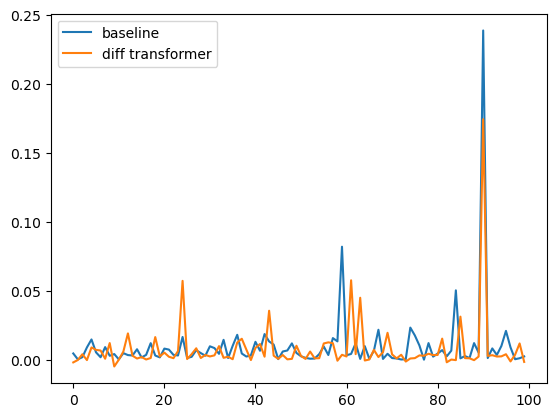

In [5]:
plt.plot(getsoftmaxscore(), label='baseline')
plt.plot(getsoftmaxscore() - 0.2*getsoftmaxscore(), label='diff transformer')
plt.legend()

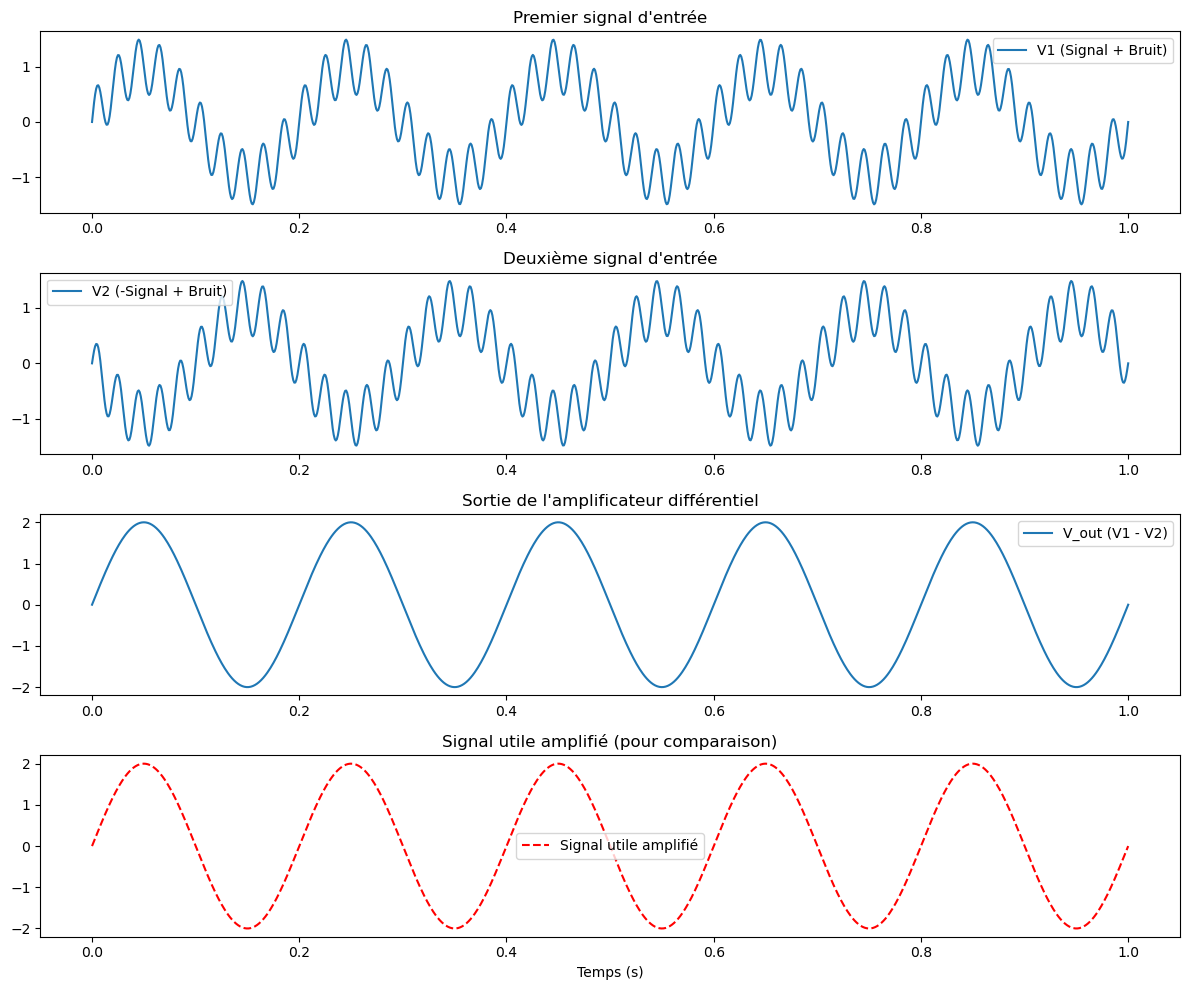

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du temps
t = np.linspace(0, 1, 1000)

# Signal utile (différentiel) : sinusoïde de 5 Hz
freq_signal = 5  # Fréquence du signal utile
signal = np.sin(2 * np.pi * freq_signal * t)

# Bruit en mode commun : sinusoïde de 50 Hz
freq_bruit = 50  # Fréquence du bruit
bruit = 0.5 * np.sin(2 * np.pi * freq_bruit * t)

# Signaux d'entrée
V1 = signal + bruit        # Premier signal d'entrée
V2 = -signal + bruit       # Deuxième signal d'entrée (signal opposé)

# Sortie de l'amplificateur différentiel (soustraction des entrées)
V_out = V1 - V2

# Tracé des signaux
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, V1, label='V1 (Signal + Bruit)')
plt.legend()
plt.title('Premier signal d\'entrée')

plt.subplot(4, 1, 2)
plt.plot(t, V2, label='V2 (-Signal + Bruit)')
plt.legend()
plt.title('Deuxième signal d\'entrée')

plt.subplot(4, 1, 3)
plt.plot(t, V_out, label='V_out (V1 - V2)')
plt.legend()
plt.title('Sortie de l\'amplificateur différentiel')

plt.subplot(4, 1, 4)
plt.plot(t, 2*signal, 'r--', label='Signal utile amplifié')
plt.legend()
plt.title('Signal utile amplifié (pour comparaison)')

plt.xlabel('Temps (s)')
plt.tight_layout()
plt.show()

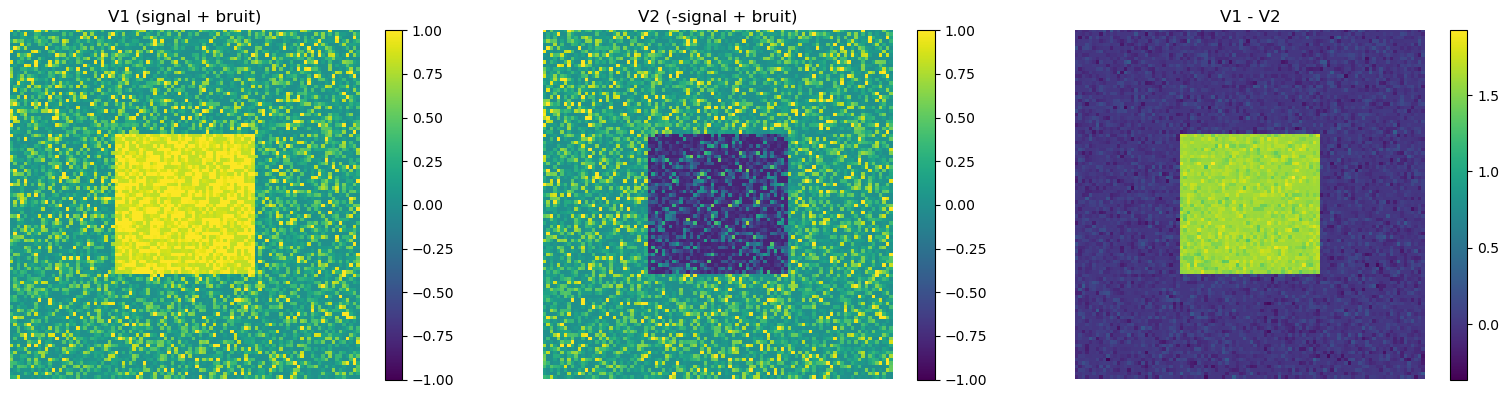

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Taille de l'image
rows, cols = 100, 100

# Création du signal utile : un carré blanc au centre de l'image noire
signal = np.zeros((rows, cols))
signal[30:70, 30:70] = 0.8  # Un carré de valeur 1 au centre

# Bruit en mode commun : bruit gaussien
#np.random.seed(0)  # Pour la reproductibilité
bruit_commun = np.clip(np.random.normal(0, 0.5, (rows, cols)), 0, None)
bruit1 = np.clip(np.random.normal(0, 0.1, (rows, cols)), 0, None)
bruit2 = np.clip(np.random.normal(0, 0.1, (rows, cols)), 0, None)
#bruit_commun = np.random.normal(0, 0.5, (rows, cols))
#bruit1 = np.random.normal(0, 0.3, (rows, cols))
#bruit2 = np.random.normal(0, 0.3, (rows, cols))

# Signaux d'entrée
V1 = signal + bruit_commun + bruit1        # Premier signal d'entrée avec bruit
V2 = -signal + bruit_commun + bruit2       # Deuxième signal d'entrée avec bruit

# Sortie de l'amplificateur différentiel (soustraction des entrées)
V_out = V1 - 1 * V2

# Tracé des signaux
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

cmap='viridis'

im1 = axes[0].imshow(V1, cmap=cmap, vmin=-1, vmax=1)
axes[0].set_title('V1 (signal + bruit)')
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(V2, cmap=cmap, vmin=-1, vmax=1)
axes[1].set_title('V2 (-signal + bruit)')
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(V_out, cmap=cmap)
axes[2].set_title('V1 - V2')
axes[2].axis('off')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.savefig("noise_comp.png", dpi=600)
plt.show()


In [130]:
mask = np.ones((rows, cols), dtype=bool)
mask[30:70, 30:70] = False  # Ignorer la zone du carré (signal)

# Calculer la magnitude moyenne de V1 et V2 en dehors de la zone du signal
mean_magnitude_V1_outside = np.mean(V1[mask]**2)
mean_magnitude_V2_outside = np.mean(V2[mask]**2)
mean_magnitude_Vout_outside = np.mean(V_out[mask]**2)
print("Magnitude moyenne de V1 en dehors du signal : ", mean_magnitude_V1_outside)
print("Magnitude moyenne de V2 en dehors du signal : ", mean_magnitude_V2_outside)
print("Magnitude moyenne de Vout en dehors du signal : ", mean_magnitude_Vout_outside)

Magnitude moyenne de V1 en dehors du signal :  0.15117630432089493
Magnitude moyenne de V2 en dehors du signal :  0.15149825508397624
Magnitude moyenne de Vout en dehors du signal :  0.0069138564480172165


In [131]:
mask = np.zeros((rows, cols), dtype=bool)
mask[30:70, 30:70] = True  # Ignorer la zone du carré (signal)

# Calculer la magnitude moyenne de V1 et V2 en dehors de la zone du signal
mean_magnitude_V1_outside = np.mean(V1[mask]**2)
mean_magnitude_V2_outside = np.mean(V2[mask]**2)
mean_magnitude_Vout_outside = np.mean(V_out[mask]**2)
print("Magnitude moyenne de V1 dans le signal : ", mean_magnitude_V1_outside)
print("Magnitude moyenne de V2 dans le signal : ", mean_magnitude_V2_outside)
print("Magnitude moyenne de Vout dans le signal : ", mean_magnitude_Vout_outside)

Magnitude moyenne de V1 dans le signal :  1.1428164615056167
Magnitude moyenne de V2 dans le signal :  0.41148903595962194
Magnitude moyenne de Vout dans le signal :  2.567625218233254


In [210]:
from PIL import Image
import numpy as np

# Ouvrir l'image avec Pillow
image = Image.open("aGrand.bmp")

# Convertir en tableau NumPy
image_array = 1 - np.array(image).mean(axis=2)/255
image_array *= 1/image_array.max()

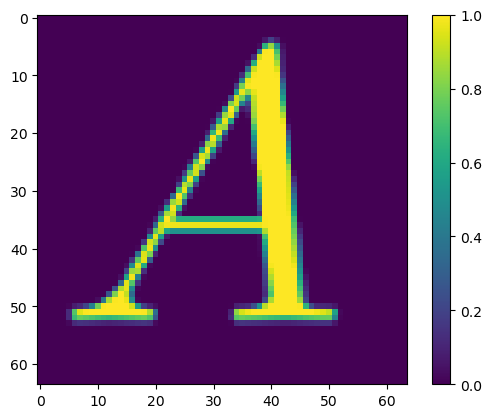

In [211]:
plt.imshow(image_array, cmap=cmap)
plt.colorbar()

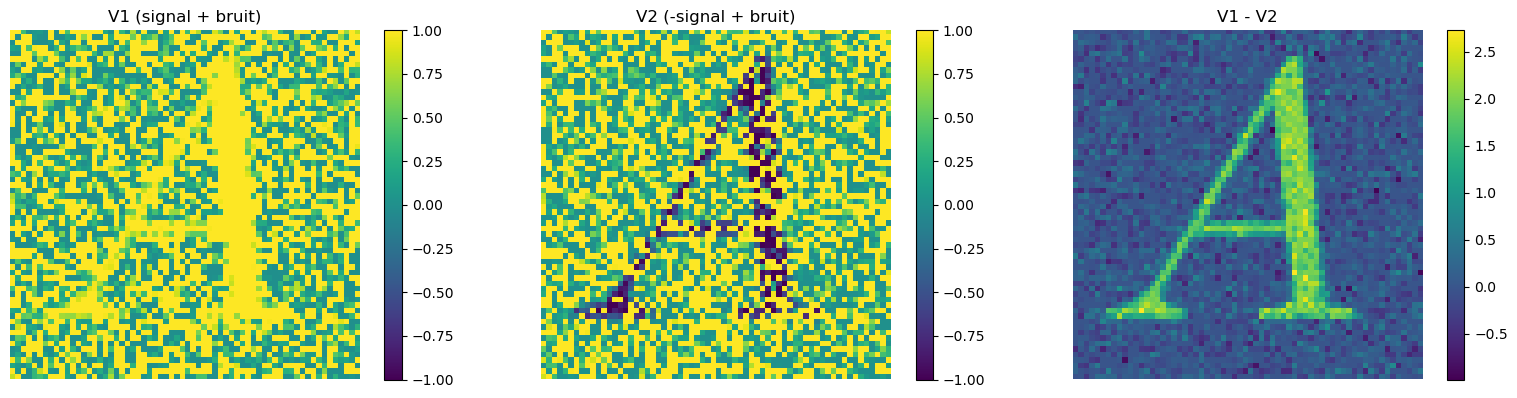

In [216]:
rows, cols = 64, 64
bruit_commun = np.clip(np.random.normal(0, 5, (rows, cols)), 0, None)
bruit1 = np.clip(np.random.normal(0, 0.3, (rows, cols)), 0, None)
bruit2 = np.clip(np.random.normal(0, 0.3, (rows, cols)), 0, None)
#bruit_commun = np.random.normal(0, 0.5, (rows, cols))
#bruit1 = np.random.normal(0, 0.3, (rows, cols))
#bruit2 = np.random.normal(0, 0.3, (rows, cols))

# Signaux d'entrée
V1 = image_array + bruit_commun + bruit1        # Premier signal d'entrée avec bruit
V2 = -image_array + bruit_commun + bruit2       # Deuxième signal d'entrée avec bruit

# Sortie de l'amplificateur différentiel (soustraction des entrées)
V_out = V1 - 1 * V2

# Tracé des signaux
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

cmap='viridis'

im1 = axes[0].imshow(V1, cmap=cmap, vmin=-1, vmax=1)
axes[0].set_title('V1 (signal + bruit)')
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(V2, cmap=cmap, vmin=-1, vmax=1)
axes[1].set_title('V2 (-signal + bruit)')
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(V_out, cmap=cmap)
axes[2].set_title('V1 - V2')
axes[2].axis('off')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.savefig("noise_comp_grandA_bruit_1_5.png", dpi=600)
plt.show()